# 04_perceptron

# Q1：Logistic Sigmoid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png" height="30%" width="30%" align="left">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2：Logistic Sigmoid をアクティベーション関数として持つ、<br>&emsp;&emsp;&emsp;パーセプトロンのモデルについて調べ説明せよ。

# A2.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  

### 【Logistic Sigmoidをアクティベーション関数に持つパーセプトロンモデル】

<img src="images/method.png" height="50%" width="50%" align="left">

# Q3：0 を false, 1 を true としたとき、論理否定を行う関数を、<br>&emsp;&emsp;&emsp;Logistic Sigmoid をアクティベーション関数として<br>&emsp;&emsp;&emsp;持つパーセプトロンを用いて作成せよ。<br><br>&emsp;&emsp;&emsp;パーセプトロンのパラメータの調整には、<br>&emsp;&emsp;&emsp;平均二乗誤差と最急降下法を用いること。<br><br>&emsp;&emsp;&emsp;また、調整済みのパラメータを保存し、<br>&emsp;&emsp;&emsp;作成した関数を他のプログラムからいつでも利用できるようにせよ。

# A3. 

<table>
<tbody>
<tr>
<td width="25%">
<img src="images/perseptorn.png"/>
    <p>パーセプトロン構成図</p>
</td>
<td width="25%">
<img src="images/exp_diff.png"/>
    <p>指数微分の確認</p>
</td>
<td width="25%">
<img src="images/param_a.png"/>
    <p>パラメータa 更新式</p>
</td>
<td width="25%">
<img src="images/param_b.png"/>
    <p>パラメータb 更新式</p>
</td>
</tr>
</tbody>
</table>

**用意するデータ**  
入力データ = np.array([0,0,・・・,0])  # 5000個  
正解データ = np.array([1, 1,・・・・,1])  # 5000個  
データ総数nとする  


**入力層(式)**  
$
y= a*X+ b
$

**中間層(シグモイド関数: a=1とする)**  
$ 
S = \frac{1}{1-e^-y}  
$

**誤差関数(平均二乗誤差)**  
平均二乗誤差とは、予測値と真の値の離れ具合の平均を求める。  
引用：http://ebw.eng-book.com/heishin/MeanSquaredError_mean_squared_error_calculation.do?category=mean_squared_error  


**誤差関数式(平均二乗誤差)**  

**※正解データを Z と置く**  
$
平均二乗誤差 = \frac{1}{データの総数(n)}\sum_{i}(予測データ - Z_i)^2
$  

**パラメータ更新式**   
$  
E(a) = \frac{1}{n}\sum_{i}{((\frac{1}{1-e^-(aX_i+b)}) -Z_i)^2}
$


パラメータ更新では、予測値Sと正解データZの誤差が最小になるよう更新する  
最急降下法を使いパラメータ更新を行う。  

**最急降下法**  
$
a^(k+1) = a^(k) - α\frac{d \frac{1}{n}\sum_{i}((\frac{1}{1+e^-(aX_i+b)})-Z_i)^2}{d  a}
$  

**パラメータa 更新式**  
$
a^(k+1) = a^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*\frac{1}{1+e^-aX_i+b}*(X_i-\frac{1}{1+e^-aX_i+b}))  
$

**パラメータb 更新式**  
$
b^(k+1) =  b^(k) -v\frac{1}{n}*2*\sum_{i}(((\frac{1}{1+e^-(aX_i+b)})-Z_i)*\frac{1}{1+e^-aX_i+b}*(1-\frac{1}{1+e^-aX_i+b}))
$

<img src="images/q4.png" height="100%" width="100%" align="left">

### 入力データ用意

In [2]:
q3_input_data = np.zeros(5000)  # 0の配列
q3_answer = np.ones(5000)  # 1の配列
q3_data = np.stack([q3_input_data, q3_answer],1)

# 学習

誤差 :  0.18109917149760932
誤差 :  0.1704812449225962
誤差 :  0.16065451046505802
誤差 :  0.15156634646120906
誤差 :  0.14316409571516847
誤差 :  0.13539623117159152
誤差 :  0.12821318834356832
誤差 :  0.12156792233486098
誤差 :  0.11541624540121627
誤差 :  0.10971699542465545
誤差 :  0.10443207841859264
誤差 :  0.09952642055968425
誤差 :  0.0949678580483313
誤差 :  0.09072698674487295
誤差 :  0.0867769881648988
誤差 :  0.08309344404448993
誤差 :  0.07965414821921882
誤差 :  0.07643892187299293
誤差 :  0.07342943617459637
誤差 :  0.07060904480260766
誤差 :  0.06796262775346645
誤差 :  0.06547644703876572
誤差 :  0.06313801432927857
誤差 :  0.06093597023565642
誤差 :  0.05885997467930785
誤差 :  0.05690060766699422
誤差 :  0.05504927971086568
誤差 :  0.053298151110858234
誤差 :  0.05164005932425656
誤差 :  0.05006845367552705
誤差 :  0.04857733670116313
誤差 :  0.04716121147276754
誤差 :  0.04581503429347512
誤差 :  0.0445341722151794
誤差 :  0.043314364874646544
誤差 :  0.04215169019560399
誤差 :  0.04104253354875487
誤差 :  0.03998356000380638
誤差 :  0.038971

誤差 :  0.0038821340911035685
誤差 :  0.0038689045072434545
誤差 :  0.003855761891985069
誤差 :  0.0038427054051339083
誤差 :  0.003829734217163221
誤差 :  0.0038168475090480107
誤差 :  0.003804044472097625
誤差 :  0.0037913243077945906
誤差 :  0.0037786862276408305
誤差 :  0.003766129452996836
誤差 :  0.003753653214932395
誤差 :  0.0037412567540755495
誤差 :  0.0037289393204676478
誤差 :  0.003716700173417164
誤差 :  0.003704538581359595
誤差 :  0.003692453821715656
誤差 :  0.003680445180759031
誤差 :  0.003668511953478447
誤差 :  0.003656653443450195
誤差 :  0.003644868962704217
誤差 :  0.0036331578315994067
誤差 :  0.0036215193787004964
誤差 :  0.003609952940652267
誤差 :  0.003598457862062941
誤差 :  0.003587033495383238
誤差 :  0.003575679200789886
誤差 :  0.0035643943460763024
誤差 :  0.0035531783065335704
誤差 :  0.0035420304648461146
誤差 :  0.003530950210980944
誤差 :  0.003519936942081789
誤差 :  0.003508990062365007
誤差 :  0.0034981089830172407
誤差 :  0.0034872931220937316
誤差 :  0.003476541904419048
誤差 :  0.003465854761490224
誤差 :  0.00345

誤差 :  0.001894232165023271
誤差 :  0.0018909523603382603
誤差 :  0.0018876836414369188
誤差 :  0.0018844259528584587
誤差 :  0.00188117923950756
誤差 :  0.0018779434466533107
誤差 :  0.0018747185199252646
誤差 :  0.0018715044053105282
誤差 :  0.0018683010491510525
誤差 :  0.0018651083981405037
誤差 :  0.0018619263993213994
誤差 :  0.0018587550000823707
誤差 :  0.0018555941481561255
誤差 :  0.0018524437916151203
誤差 :  0.0018493038788697416
誤差 :  0.0018461743586654787
誤差 :  0.0018430551800802835
誤差 :  0.0018399462925220895
誤差 :  0.0018368476457252605
誤差 :  0.001833759189748857
誤差 :  0.001830680874974023
誤差 :  0.001827612652100223
誤差 :  0.0018245544721449572
誤差 :  0.0018215062864389221
誤差 :  0.00181846804662481
誤差 :  0.0018154397046544354
誤差 :  0.001812421212786425
誤差 :  0.0018094125235832137
誤差 :  0.0018064135899103673
誤差 :  0.0018034243649316017
誤差 :  0.0018004448021085768
誤差 :  0.001797474855197521
誤差 :  0.0017945144782469664
誤差 :  0.0017915636255959534
誤差 :  0.0017886222518710088
誤差 :  0.0017856903119852785
誤差

誤差 :  0.0011856683829920707
誤差 :  0.001184358431887722
誤差 :  0.0011830513214458453
誤差 :  0.0011817470425199384
誤差 :  0.001180445586002481
誤差 :  0.0011791469428243334
誤差 :  0.0011778511039552343
誤差 :  0.0011765580604032265
誤差 :  0.0011752678032142718
誤差 :  0.0011739803234732985
誤差 :  0.0011726956123014841
誤差 :  0.001171413660858716
誤差 :  0.0011701344603422276
誤差 :  0.001168858001985664
誤差 :  0.001167584277060211
誤差 :  0.0011663132768741627
誤差 :  0.001165044992771595
誤差 :  0.0011637794161337266
誤差 :  0.0011625165383775942
誤差 :  0.0011612563509564992
誤差 :  0.001159998845359433
誤差 :  0.001158744013110891
誤差 :  0.0011574918457712786
誤差 :  0.0011562423349358044
誤差 :  0.0011549954722349836
誤差 :  0.001153751249334546
誤差 :  0.0011525096579347246
誤差 :  0.0011512706897699738
誤差 :  0.0011500343366093858
誤差 :  0.0011488005902568282
誤差 :  0.0011475694425489705
誤差 :  0.0011463408853575922
誤差 :  0.0011451149105873026
誤差 :  0.001143891510176688
誤差 :  0.0011426706760974468
誤差 :  0.001141452400354125
誤差 

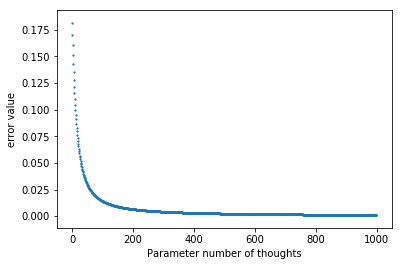

In [3]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b
    

if __name__=='__main__':
    np.random.shuffle(q3_data)  # 入力データをシャッフル
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.5  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}


    for _ in range(1000):
        # 最後のパラメータを保存
        parameter["a"].append(a)
        parameter["b"].append(b)
        y = neuron.input_layer(q3_data[:,0])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, q3_data[:,1])  # 出力層　： 誤差関数

        a, b = neuron.parameter_update(q3_data[:,0], q3_data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a"].append(a)
        parameter["b"].append(b)
            
        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    print("書き出し parameter['a'][-1] : ", parameter['a'][-1])
    print("書き出し parameter['b'][-1] : ", parameter['b'][-1])
    
    with open('output/output_Q3.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1.5)

    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()

# Q4. 真の入力値が 0 のとき関数の受け取る入力が平均 0 標準偏差 0.5 の<br>&emsp;&emsp;正規分布に従い、真の入力値が 1 のとき関数の受け取る入力が<br>&emsp;&emsp;平均 1 分散 0.5 の正規分布に従うとする。<br><br>&emsp;&emsp;この時、問題 3 で作成した論理否定を行う関数の正解率を求め、<br>&emsp;&emsp;その結果について考察し、必要があれば正解率を改善せよ。

# ----------------------------------------------------------------------
# 学習データ(入力値)作成

## 真の値が0の時に入力値は「平均0, 標準偏差√0.01の正規分布に従う」

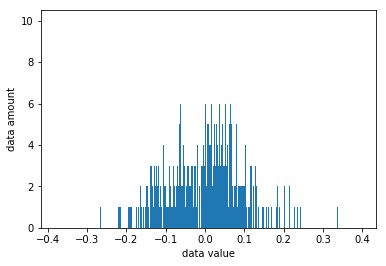

In [4]:
# 真の入力値が 0の時
input_0_data = np.random.normal(0, math.sqrt(0.01), (1,5000))

plt.hist(input_0_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

##  真の入力値は「 1 のとき関数の受け取る入力が平均 1 標準偏差√0.01 の正規分布に従う」

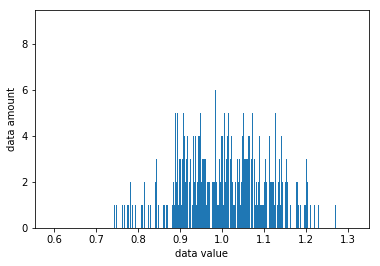

In [5]:
# 真の入力値が 1の時
input_1_data = np.random.normal(1, math.sqrt(0.01), (1,5000))
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

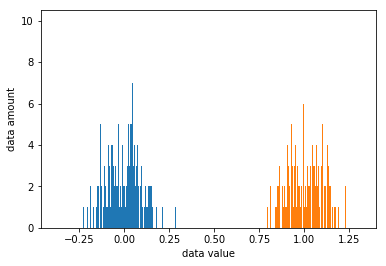

In [6]:
plt.hist(input_0_data[0], 5000)
plt.hist(input_1_data[0], 5000)
plt.xlabel('data value')
plt.ylabel('data amount')
plt.show()

In [7]:
# 入力値を結合して準備
input_data = np.concatenate([input_0_data[0], input_1_data[0]])
input_data

array([ 0.03909819, -0.11053644, -0.04310666, ...,  0.82973411,
        1.11135176,  1.10739175])

### 作成済みデータを保存

In [8]:
# print(type(input_1_data))
# #csvファイルとして保存
# np.savetxt('input_0_data.csv',input_0_data,delimiter=',')
# np.savetxt('input_1_data.csv',input_1_data,delimiter=',')

### 正解データを作る

In [9]:
# 正解データを作る
answer_0 = np.zeros(5000)  # 0の配列
answer_1 = np.ones(5000)  # 1の配列
answer = np.concatenate([answer_1, answer_0])  # 1,0配列を横に結合
answer

array([1., 1., 1., ..., 0., 0., 0.])

# 学習

誤差 :  0.328508103762802
誤差 :  0.3262837100131319
誤差 :  0.32405692289215327
誤差 :  0.3218284391438056
誤差 :  0.3195989617438289
誤差 :  0.31736919858364443
誤差 :  0.3151398611227074
誤差 :  0.312911663015076
誤差 :  0.31068531871620686
誤差 :  0.30846154207614634
誤差 :  0.3062410449255508
誤差 :  0.3040245356609796
誤差 :  0.30181271783607405
誤差 :  0.29960628876515
誤差 :  0.29740593814574523
誤差 :  0.29521234670657315
誤差 :  0.29302618488710913
誤差 :  0.290848111554914
誤差 :  0.2886787727664737
誤差 :  0.2865188005770798
誤差 :  0.28436881190489793
誤差 :  0.2822294074539697
誤差 :  0.28010117070052243
誤差 :  0.2779846669464379
誤差 :  0.275880442443295
誤差 :  0.2737890235898994
誤差 :  0.27171091620564874
誤差 :  0.2696466048816557
誤差 :  0.26759655241089747
誤差 :  0.26556119929824407
誤差 :  0.2635409633506674
誤差 :  0.2615362393473744
誤差 :  0.2595473987892174
誤差 :  0.25757478972621345
誤差 :  0.25561873666156926
誤差 :  0.25367954053019875
誤差 :  0.2517574787493899
誤差 :  0.24985280533886747
誤差 :  0.24796575110723587
誤差 :  0.24609

誤差 :  0.055938812096550404
誤差 :  0.0557246872903625
誤差 :  0.05551174446281211
誤差 :  0.055299976933240395
誤差 :  0.055089378050845746
誤差 :  0.05487994119464371
誤差 :  0.05467165977343202
誤差 :  0.05446452722575617
誤差 :  0.0542585370198756
誤差 :  0.05405368265373012
誤差 :  0.05384995765490288
誤差 :  0.053647355580590944
誤差 :  0.05344587001756778
誤差 :  0.053245494582151595
誤差 :  0.053046222920169646
誤差 :  0.052848048706925554
誤差 :  0.05265096564716441
誤差 :  0.05245496747503755
誤差 :  0.052260047954067614
誤差 :  0.052066200877114284
誤差 :  0.05187342006633628
誤差 :  0.051681699373157176
誤差 :  0.05149103267822602
誤差 :  0.05130141389138203
誤差 :  0.05111283695161477
誤差 :  0.050925295827025936
誤差 :  0.05073878451479054
誤差 :  0.050553297041115344
誤差 :  0.050368827461198654
誤差 :  0.050185369859187645
誤差 :  0.0500029183481369
誤差 :  0.049821467069965056
誤差 :  0.049641010195409195
誤差 :  0.04946154192398092
誤差 :  0.049283056483919674
誤差 :  0.049105548132145564
誤差 :  0.04892901115421287
誤差 :  0.048753439864259

誤差 :  0.023161473112956268
誤差 :  0.02311560625148393
誤差 :  0.023069930567758613
誤差 :  0.02302444502020911
誤差 :  0.02297914857385129
誤差 :  0.02293404020024383
誤差 :  0.022889118877443822
誤差 :  0.022844383589962613
誤差 :  0.022799833328722888
誤差 :  0.02275546709101392
誤差 :  0.02271128388045008
誤差 :  0.022667282706926865
誤差 :  0.022623462586578966
誤差 :  0.02257982254173702
誤差 :  0.022536361600887872
誤差 :  0.022493078798630297
誤差 :  0.022449973175635164
誤差 :  0.022407043778604193
誤差 :  0.022364289660228135
誤差 :  0.02232170987914772
誤差 :  0.022279303499912164
誤差 :  0.022237069592939265
誤差 :  0.022195007234476732
誤差 :  0.022153115506561002
誤差 :  0.022111393496979173
誤差 :  0.022069840299229624
誤差 :  0.022028455012484256
誤差 :  0.02198723674154808
誤差 :  0.02194618459682297
誤差 :  0.0219052976942688
誤差 :  0.021864575155365964
誤差 :  0.021824016107078164
誤差 :  0.021783619681814914
誤差 :  0.021743385017395134
誤差 :  0.02170331125700974
誤差 :  0.021663397549186194
誤差 :  0.021623643047751284
誤差 :  0.021584

誤差 :  0.01464483364590792
誤差 :  0.014629260251374135
誤差 :  0.014613730631093972
誤差 :  0.014598244611671814
誤差 :  0.0145828020205764
誤差 :  0.014567402686136374
誤差 :  0.014552046437534659
誤差 :  0.014536733104802699
誤差 :  0.014521462518817356
誤差 :  0.014506234511294736
誤差 :  0.014491048914784773
誤差 :  0.014475905562667861
誤差 :  0.014460804289148768
誤差 :  0.014445744929252442
誤差 :  0.014430727318818799
誤差 :  0.014415751294498373
誤差 :  0.014400816693747228
誤差 :  0.014385923354822512
誤差 :  0.014371071116778043
誤差 :  0.01435625981945866
誤差 :  0.014341489303496964
誤差 :  0.014326759410307898
誤差 :  0.01431206998208429
誤差 :  0.014297420861792878
誤差 :  0.0142828118931686
誤差 :  0.014268242920712115
誤差 :  0.01425371378968316
誤差 :  0.014239224346097853
誤差 :  0.014224774436723268
誤差 :  0.014210363909074061
誤差 :  0.014195992611407419
誤差 :  0.014181660392718478
誤差 :  0.014167367102737105
誤差 :  0.014153112591923115
誤差 :  0.014138896711462167
誤差 :  0.014124719313261315
誤差 :  0.014110580249944979
誤差 :  0.0

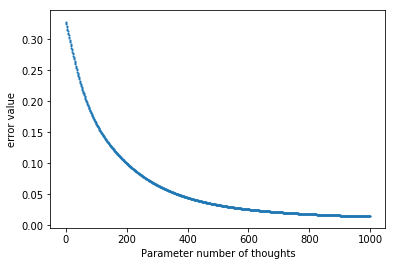

In [10]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a, b, v):
        self._a = a  # 重みパラメータ
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a*x + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, input_data, answer, predicted_data):
        """パラメータ更新
        param1 : input_data(入力値)
        param2 : answer (正解値)
        param3 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a = self._a - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(input_data-predicted_data)))))  # 重みパラメータ
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a, self._b

if __name__=='__main__':
    data = np.stack([input_data, answer],1)  # [入力データ , 正解データ] 
    
    a = 0.5   # 初期値のパラメータ
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a, b, v)  # インスタンス化 
    parameter = {"a":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,1])  # 出力層　： 誤差関数

        a, b = neuron.parameter_update(data[:,0], data[:,1], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a"].append(a)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a : ", parameter["a"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# Q5 <br><br>0 を false, 1 を true としたとき、論理和、論理積<br>を実現するパーセプトロンを問 3, 4 のときと同様に作成せよ。

<table>
<tbody>
<tr>
<td width="25%">
<img src="images/q5_.png"/>
    <p>論理和、論理積、Q6:排他的論理和</p>
</td>
<td width="25%">
<img src="images/q5_parseptron.png"/>
    <p>多項式パーセプトリン</p>
</td>
<td width="25%">
<img src="images/q5_param_a.png"/>
    <p>パラメータa1、a2 更新式</p>
</td>
<td width="25%">
<img src="images/q5_param_b.png"/>
    <p>パラメータb 更新式</p>
</td>
</tr>
</tbody>
</table>

# A 「論理和」+「Q3: 入力値分散なし」

# 入力データ

In [11]:
# 入力データ作成 [入力A, 入力B, 正解値]
q5_data_OR = np.array([[1,1,1],
                                    [1,0,1],
                                    [0,1,1],
                                    [0,0,0]])

誤差 :  0.14202062607837013
誤差 :  0.14164274627667206
誤差 :  0.14126925435211812
誤差 :  0.14090005876963285
誤差 :  0.14053507028305307
誤差 :  0.14017420187306995
誤差 :  0.13981736868690608
誤差 :  0.13946448797968325
誤差 :  0.13911547905743682
誤差 :  0.13877026322173444
誤差 :  0.13842876371585594
誤差 :  0.1380909056724935
誤差 :  0.1377566160629306
誤差 :  0.13742582364766004
誤差 :  0.1370984589284014
誤差 :  0.13677445410147937
誤差 :  0.13645374301252572
誤差 :  0.1361362611124671
誤差 :  0.13582194541476325
誤差 :  0.1355107344538603
誤差 :  0.1352025682448243
誤差 :  0.1348973882441217
誤差 :  0.1345951373115141
誤差 :  0.1342957596730346
誤差 :  0.13399920088501568
誤差 :  0.13370540779913692
誤差 :  0.13341432852846435
誤差 :  0.13312591241445146
誤差 :  0.1328401099948745
誤差 :  0.13255687297267438
誤差 :  0.13227615418567948
誤差 :  0.13199790757718216
誤差 :  0.13172208816734549
誤差 :  0.13144865202541395
誤差 :  0.13117755624270683
誤差 :  0.13090875890636863
誤差 :  0.1306422190738566
誤差 :  0.1303778967481411
誤差 :  0.1301157528536008

誤差 :  0.08379836912878395
誤差 :  0.08376810435244028
誤差 :  0.08373805421753847
誤差 :  0.08370821792370534
誤差 :  0.08367859467081709
誤差 :  0.08364918365901697
誤差 :  0.08361998408873342
誤差 :  0.08359099516069735
誤差 :  0.08356221607596022
誤差 :  0.08353364603591124
誤差 :  0.0835052842422955
誤差 :  0.08347712989723115
誤差 :  0.08344918220322674
誤差 :  0.08342144036319914
誤差 :  0.08339390358049044
誤差 :  0.08336657105888558
誤差 :  0.0833394420026293
誤差 :  0.0833125156164437
誤差 :  0.08328579110554496
誤差 :  0.08325926767566073
誤差 :  0.08323294453304687
誤差 :  0.08320682088450465
誤差 :  0.08318089593739732
誤差 :  0.08315516889966697
誤差 :  0.08312963897985153
誤差 :  0.0831043053871009
誤差 :  0.08307916733119398
誤差 :  0.08305422402255486
誤差 :  0.08302947467226929
誤差 :  0.0830049184921012
誤差 :  0.08298055469450873
誤差 :  0.08295638249266038
誤差 :  0.08293240110045133
誤差 :  0.08290860973251926
誤差 :  0.0828850076042603
誤差 :  0.08286159393184496
誤差 :  0.08283836793223365
誤差 :  0.08281532882319267
誤差 :  0.0827924758

誤差 :  0.08207716916938684
誤差 :  0.08208328213602165
誤差 :  0.08208939461035367
誤差 :  0.08209550648422849
誤差 :  0.08210161765030494
誤差 :  0.08210772800205068
誤差 :  0.08211383743373861
誤差 :  0.08211994584044227
誤差 :  0.08212605311803231
誤差 :  0.08213215916317221
誤差 :  0.08213826387331416
誤差 :  0.08214436714669544
誤差 :  0.08215046888233396
誤差 :  0.0821565689800246
誤差 :  0.08216266734033525
誤差 :  0.08216876386460273
誤差 :  0.08217485845492895
誤差 :  0.08218095101417694
誤差 :  0.08218704144596692
誤差 :  0.08219312965467251
誤差 :  0.0821992155454169
誤差 :  0.08220529902406862
誤差 :  0.08221137999723829
誤差 :  0.08221745837227419
誤差 :  0.08222353405725885
誤差 :  0.08222960696100509
誤差 :  0.08223567699305209
誤差 :  0.08224174406366185
誤差 :  0.08224780808381545
誤差 :  0.08225386896520887
誤差 :  0.08225992662024982
誤差 :  0.08226598096205355
誤差 :  0.08227203190443945
誤差 :  0.08227807936192721
誤差 :  0.08228412324973315
誤差 :  0.08229016348376653
誤差 :  0.08229619998062589
誤差 :  0.0823022326575955
誤差 :  0.0823082

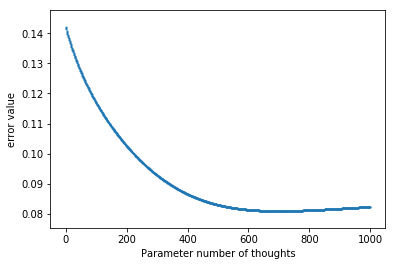

In [12]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a1, a2, b, v):
        self._a1 = a1  # 重みパラメータa1
        self._a2 = a2  # 重みパラメータa2        
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x1, x2):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a1*x1 + self._a2*x2 + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, x1, x2, answer, predicted_data):
        """パラメータ更新
        param1 : x1(入力1)
        param2 : x2(入力2)
        param3 : answer (正解値)
        param4 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a1 = self._a1 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x1-predicted_data)))))  # 重みパラメータa1
        self._a2 = self._a2 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x2-predicted_data)))))  # 重みパラメータa2       
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a1, self._a2, self._b

if __name__=='__main__':
    data = q5_data_OR  # [入力1, 入力2 , 正解データ] 
    
    a1 = 0.5   # 初期値のパラメータa1
    a2 = 0.5   # 初期値のパラメータa2
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a1, a2, b, v)  # インスタンス化 
    parameter = {"a1":[], "a2":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0], data[:,1])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,2])  # 出力層　： 誤差関数

        a1, a2, b = neuron.parameter_update(data[:,0], data[:,1], data[:,2], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a1"].append(a1)        
        parameter["a2"].append(a2)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a 1: ", parameter["a1"][-1])
    print("最終パラメータ a 2: ", parameter["a2"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# A 「論理積」+「Q3: 入力値分散なし」

# 入力データ

In [13]:
# 入力データ作成 [入力A, 入力B, 正解値]
q5_data_AND = np.array([[1,1,1],
                                    [1,0,0],
                                    [0,1,0],
                                    [0,0,0]])

誤差 :  0.33199510720598263
誤差 :  0.3311352622570949
誤差 :  0.33027141417460865
誤差 :  0.329403591330856
誤差 :  0.3285318244876549
誤差 :  0.3276561466604888
誤差 :  0.3267765929865267
誤差 :  0.3258932005964934
誤差 :  0.3250060084903959
誤差 :  0.3241150574171001
誤差 :  0.32322038975775086
誤差 :  0.3223220494130163
誤差 :  0.3214200816941386
誤差 :  0.3205145332177619
誤差 :  0.3196054518045107
誤差 :  0.31869288638128107
誤差 :  0.31777688688720945
誤差 :  0.31685750418327696
誤差 :  0.31593478996550595
誤差 :  0.3150087966817008
誤差 :  0.3140795774516881
誤差 :  0.3131471859909998
誤差 :  0.3122116765379527
誤差 :  0.3112731037840646
誤差 :  0.31033152280775533
誤差 :  0.3093869890112723
誤差 :  0.30843955806078527
誤差 :  0.30748928582958734
誤差 :  0.3065362283443453
誤差 :  0.30558044173433524
誤差 :  0.3046219821836026
誤差 :  0.3036609058859847
誤差 :  0.3026972690029309
誤差 :  0.3017311276240573
誤差 :  0.30076253773037304
誤差 :  0.2997915551601117
誤差 :  0.29881823557710385
誤差 :  0.29784263444162645
誤差 :  0.29686480698366274
誤差 :  0.295

誤差 :  0.0789443786935874
誤差 :  0.07885192453157673
誤差 :  0.07876005431313074
誤差 :  0.07866876075179308
誤差 :  0.07857803666383564
誤差 :  0.07848787496685901
誤差 :  0.07839826867840782
誤差 :  0.07830921091460175
誤差 :  0.07822069488878157
誤差 :  0.07813271391017036
誤差 :  0.07804526138255014
誤差 :  0.07795833080295334
誤差 :  0.07787191576036954
誤差 :  0.07778600993446735
誤差 :  0.07770060709433091
誤差 :  0.07761570109721162
誤差 :  0.07753128588729463
誤差 :  0.07744735549447998
誤差 :  0.07736390403317872
誤差 :  0.0772809257011233
誤差 :  0.07719841477819263
誤差 :  0.07711636562525186
誤差 :  0.07703477268300585
誤差 :  0.07695363047086778
誤差 :  0.07687293358584107
誤差 :  0.0767926767014161
誤差 :  0.07671285456648022
誤差 :  0.07663346200424223
誤差 :  0.07655449391117021
誤差 :  0.07647594525594321
誤差 :  0.07639781107841638
誤差 :  0.07632008648859943
誤差 :  0.07624276666564883
誤差 :  0.0761658468568726
誤差 :  0.0760893223767487
誤差 :  0.07601318860595618
誤差 :  0.07593744099041905
誤差 :  0.07586207504036312
誤差 :  0.075787086

誤差 :  0.0619094197245973
誤差 :  0.06187242673747709
誤差 :  0.06183548579842356
誤差 :  0.061798596726423266
誤差 :  0.0617617593418273
誤差 :  0.06172497346633666
誤差 :  0.06168823892298725
誤差 :  0.061651555536135424
誤差 :  0.06161492313144375
誤差 :  0.061578341535866644
誤差 :  0.06154181057763645
誤差 :  0.061505330086249616
誤差 :  0.061468899892453126
誤差 :  0.061432519828230996
誤差 :  0.061396189726790944
誤差 :  0.06135990942255127
誤差 :  0.06132367875112798
誤差 :  0.06128749754932189
誤差 :  0.061251365655106124
誤差 :  0.06121528290761356
誤差 :  0.06117924914712454
誤差 :  0.06114326421505477
誤差 :  0.061107327953943184
誤差 :  0.06107144020744027
誤差 :  0.06103560082029625
誤差 :  0.06099980963834959
誤差 :  0.060964066508515574
誤差 :  0.06092837127877505
誤差 :  0.060892723798163295
誤差 :  0.060857123916759064
誤差 :  0.060821571485673624
誤差 :  0.06078606635704033
誤差 :  0.060750608384003695
誤差 :  0.060715197420709195
誤差 :  0.060679833322292806
誤差 :  0.06064451594487102
誤差 :  0.06060924514553048
誤差 :  0.0605740207823183

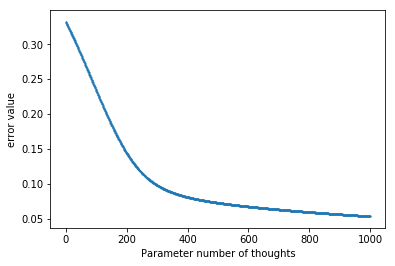

In [14]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a1, a2, b, v):
        self._a1 = a1  # 重みパラメータa1
        self._a2 = a2  # 重みパラメータa2        
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x1, x2):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a1*x1 + self._a2*x2 + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, x1, x2, answer, predicted_data):
        """パラメータ更新
        param1 : x1(入力1)
        param2 : x2(入力2)
        param3 : answer (正解値)
        param4 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a1 = self._a1 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x1-predicted_data)))))  # 重みパラメータa1
        self._a2 = self._a2 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x2-predicted_data)))))  # 重みパラメータa2       
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a1, self._a2, self._b

if __name__=='__main__':
    data = q5_data_AND  # [入力1, 入力2 , 正解データ] 
    
    a1 = 0.5   # 初期値のパラメータa1
    a2 = 0.5   # 初期値のパラメータa2
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a1, a2, b, v)  # インスタンス化 
    parameter = {"a1":[], "a2":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0], data[:,1])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,2])  # 出力層　： 誤差関数

        a1, a2, b = neuron.parameter_update(data[:,0], data[:,1], data[:,2], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a1"].append(a1)        
        parameter["a2"].append(a2)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a 1: ", parameter["a1"][-1])
    print("最終パラメータ a 2: ", parameter["a2"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# Q6.<br><br>0 を false, 1 を true としたとき、<br>排他的論理和を実現するパーセプトロンを<br>問 3, 4 のときと同様に作成せよ。<br><br>作成できない場合には、その理由について述べよ。

# A 「排他的論理和」+「Q3: 入力値分散なし」

# 入力データ

In [15]:
# 入力データ作成 [入力A, 入力B, 正解値]
q5_data_XOR = np.array([[1,1,0],
                                    [1,0,1],
                                    [0,1,1],
                                    [0,0,0]])

誤差 :  0.28493811759964943
誤差 :  0.28465389138141234
誤差 :  0.2843700996367871
誤差 :  0.28408676121485327
誤差 :  0.28380389495861885
誤差 :  0.2835215197030054
誤差 :  0.28323965427271325
誤差 :  0.2829583174799718
誤差 :  0.2826775281221688
誤差 :  0.2823973049793626
誤差 :  0.282117666811675
誤差 :  0.2818386323565646
誤差 :  0.2815602203259833
誤差 :  0.2812824494034131
誤差 :  0.28100533824078516
誤差 :  0.28072890545528284
誤差 :  0.2804531696260275
誤差 :  0.28017814929065
誤差 :  0.2799038629417473
誤差 :  0.27963032902322726
誤差 :  0.2793575659265428
誤差 :  0.2790855919868156
誤差 :  0.2788144254788534
誤差 :  0.2785440846130628
誤差 :  0.278274587531258
誤差 :  0.27800595230237035
誤差 :  0.27773819691806
誤差 :  0.2774713392882329
誤差 :  0.2772053972364671
誤差 :  0.27694038849534963
誤差 :  0.27667633070173003
誤差 :  0.2764132413918918
誤差 :  0.2761511379966474
誤差 :  0.2758900378363602
誤差 :  0.27562995811589663
誤差 :  0.27537091591951524
誤差 :  0.27511292820569444
誤差 :  0.27485601180190633
誤差 :  0.2746001833993389
誤差 :  0.27434545

誤差 :  0.25025342456059957
誤差 :  0.2502523996658863
誤差 :  0.25025137904287853
誤差 :  0.2502503625482505
誤差 :  0.25024935004367294
誤差 :  0.2502483413956905
誤差 :  0.25024733647560027
誤差 :  0.25024633515933337
誤差 :  0.25024533732733895
誤差 :  0.2502443428644706
誤差 :  0.25024335165987444
誤差 :  0.25024236360688024
誤差 :  0.25024137860289425
誤差 :  0.2502403965492949
誤差 :  0.2502394173513292
誤差 :  0.25023844091801284
誤差 :  0.2502374671620319
誤差 :  0.2502364959996455
誤差 :  0.2502355273505925
誤差 :  0.250234561137998
誤差 :  0.25023359728828354
誤差 :  0.2502326357310779
誤差 :  0.2502316763991307
誤差 :  0.25023071922822737
誤差 :  0.25022976415710546
誤差 :  0.2502288111273743
誤差 :  0.2502278600834341
誤差 :  0.2502269109723991
誤差 :  0.25022596374402056
誤差 :  0.2502250183506124
誤差 :  0.2502240747469781
誤差 :  0.2502231328903394
誤差 :  0.2502221927402659
誤差 :  0.25022125425860764
誤差 :  0.2502203174094271
誤差 :  0.25021938215893463
誤差 :  0.2502184484754243
誤差 :  0.25021751632921113
誤差 :  0.2502165856925703
誤差 :  0.2

最終パラメータ a 1:  0.0019145275412266228
最終パラメータ a 2:  0.0019145275412265385
最終パラメータ b :  -0.009294901189616435
最終誤差:  0.25000355308918776
学習回数 : 1000 回


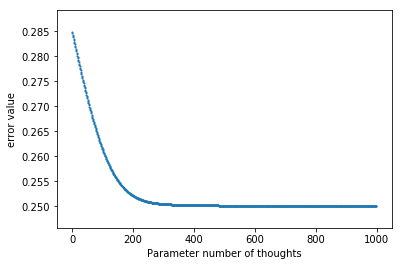

In [16]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json


class Neuron:

    def __init__(self, a1, a2, b, v):
        self._a1 = a1  # 重みパラメータa1
        self._a2 = a2  # 重みパラメータa2        
        self._b = b  # バイアス
        self._v = v  # ハイパーパラメータ
        self._error = None  

    def input_layer(self, x1, x2):
        """線形変換
        param1 : x (入力値)
        return : 入力値
        """
        y = self._a1*x1 + self._a2*x2 + self._b
        return y

    def activation_function(self, y):
        """活性化関数
        param1 : y (入力層の計算結果)
        return : 出力値
        """
        s = 1 / (1 + math.e**-y)  # シグモイド関数
        return s

    def error_function(self, s, answer):
        """誤差関数
        param1 :  s (出力値)
        param2 :  answer (正解値)
        return : 誤差
        """
        error = sum((s - answer)**2)/len(answer)  # 平均二乗誤差関数
        return error

    def parameter_update(self, x1, x2, answer, predicted_data):
        """パラメータ更新
        param1 : x1(入力1)
        param2 : x2(入力2)
        param3 : answer (正解値)
        param4 : predicted_data (予測データ)
        return : 更新済みパラメータ
        """
        self._a1 = self._a1 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x1-predicted_data)))))  # 重みパラメータa1
        self._a2 = self._a2 - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(x2-predicted_data)))))  # 重みパラメータa2       
        self._b = self._b - self._v*(1/len(predicted_data)*(sum((predicted_data-answer)*(predicted_data*(1-predicted_data))))) # バイアス
        return self._a1, self._a2, self._b

if __name__=='__main__':
    data = q5_data_XOR  # [入力1, 入力2 , 正解データ] 
    
    a1 = 0.5   # 初期値のパラメータa1
    a2 = 0.5   # 初期値のパラメータa2
    b = 0.3  # バイアス
    v = 0.1  # ハイパーパラメータ(調整項)
    error_list = []  # 誤差リスト(出力用に集計)
    neuron = Neuron(a1, a2, b, v)  # インスタンス化 
    parameter = {"a1":[], "a2":[], "b":[]}

    for _ in range(1000):
        y = neuron.input_layer(data[:,0], data[:,1])  # 入力層
        s = neuron.activation_function(y)  # 中間層
        error = neuron.error_function(s, data[:,2])  # 出力層　： 誤差関数

        a1, a2, b = neuron.parameter_update(data[:,0], data[:,1], data[:,2], s)  # パラメータ更新(引数: 入力x , 正解z, 出力s)
        parameter["a1"].append(a1)        
        parameter["a2"].append(a2)
        parameter["b"].append(b)

        print("誤差 : ", error)
        error_list.append(error)

    # 更新済みパラメータ保存
    # print("書き出し parameter : ", parameter)
    with open('output/output_Q4.json', 'w') as f:
        json.dump(parameter, f)
            
    # 描画
    print("最終パラメータ a 1: ", parameter["a1"][-1])
    print("最終パラメータ a 2: ", parameter["a2"][-1])
    print("最終パラメータ b : ", parameter["b"][-1])
    print("最終誤差: ", error_list[-1])
    print("学習回数 : %s 回" % len(error_list))
    plt.scatter(np.arange(len(error_list)),error_list, s=1, marker='o')
    plt.xlabel('Parameter number of thoughts')
    plt.ylabel('error value')
    plt.show()



# A. 「作成できない場合には、その理由について述べよ。」

### 結果を見ると、誤差の値は0.25付近から下がらなくなっているので分類ができていない。

理由として、  
- 今回作成しているパーセプトロン(図は以下)の構成では入力層に線形変換式が使われている。
- 論理否定、論理和、論理積は線形で分類可能だが、排他的論理和では曲線でないと分類することができない為。(具体例は以下)


<table>
<tbody>
<tr>
<td width="25%">
<img src="images/XOR_1.png"/>
    <p>排他的論理和</p>
</td>
<td width="25%">
<img src="images/XOR_2.png"/>
    <p>論理否定、論理和、論理積</p>
</td>
</tr>
</tbody>
</table>